### This is the ipython transcript for `VIP_locomotion_transitions.py`.<br>
the `RAPHE_locomotion_transitions.py` in `/code/analysis/analysis-scripts/` is runnig nicely<br>
### This is not complete!

In [2]:
%matplotlib inline

In [3]:
cd ../analysis/analysis-scripts/

/home/gergely/code/analysis/analysis-scripts


In [4]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import lab
import VIP_common as vc
import cPickle as pickle
import matplotlib;
matplotlib.use("pdf");

import matplotlib.pyplot as pp;
import matplotlib.backends.backend_pdf as pdf;
import matplotlib.gridspec as gs;

import seaborn as sns;

import lab;
import lab.analysis.imaging_analysis as ia;
import lab.analysis.behavior_analysis as ba;
import lab.analysis.reward_analysis as ra;

import lab.classes.exceptions as exc;

import lab.plotting.plotting_helpers as plotTools;

/home/gergely/anaconda2/lib/python2.7/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/home/gergely/code/analysis/lab/misc/lfp_helpers.py:16: UserWarning: rhd package not found, lab.misc.lfp_helpers.py will not work
  warnings.warn("rhd package not found, lab.misc.lfp_helpers.py will not work")
/home/gergely/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
expSet=lab.ExperimentSet("raphe.sql");
mouseIDs=["gtr6_a1","gtr6_a3","gtr6_a4","gtr6_a5","gtr6_b1","gtr6_b2","gtr6_b3"];

In [6]:
rfExpGroups=vc.loadExptsByType(expSet, mouseIDs, "randomForaging", channel="Ch2")
# rtExpGroups=vc.loadExptsByType(expSet, mouseIDs, "runTraining", channel="Ch2");
hrExpGroups=vc.loadHRExpGrp(expSet, mouseIDs, minLicks=10);

In [7]:
imExpGroup=list(rfExpGroups["imaging"])
imExpGroup.extend(list(hrExpGroups["imaging"]))

In [8]:
len(imExpGroup)

73

In [9]:
dfofStats = vc.calcDFOFStats(imExpGroup)

In [28]:
print(dfofStats.head(2))
print(len(dfofStats))

                                                 ROI  expt  meanExptDFOF  \
0  ([[<  Trial: gtr6_a1, stimulus = , time = 2018...  [[]]      0.011349   
1  ([[<  Trial: gtr6_a1, stimulus = , time = 2018...  [[]]      0.010412   

   medianExptDFOF  percDFOFThresh  stdExptDFOF  mouseID  \
0        0.004865       -0.057246     0.060898  gtr6_a1   
1        0.003786       -0.055590     0.058114  gtr6_a1   

                         cROI  
0  (gtr6_a1, , 1540946742427)  
1  (gtr6_a1, , 1540946755275)  
657


In [12]:
dfofStats["mouseID"]=map(lambda expt: expt.parent.get("mouseID"), dfofStats["expt"])
dfofStats["cROI"]=map(lambda roi: (roi[0].get("mouseID"), roi[1], roi[2]), dfofStats["ROI"])

In [31]:
groupedStats = dfofStats.groupby(["mouseID","cROI"])
groupedStats.

AttributeError: Cannot access callable attribute 'iloc' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [8]:
imExpGroup=lab.classes.ExperimentGroup(imExpGroup)

In [9]:
expProps=vc.loadExpPropsManualLabel(imExpGroup)

In [10]:
len(expProps)

17

In [11]:
expProps

,condition,condition_day,condition_day_session,expt
0,A,A_0,A_0_0,[[]]
1,A,A_1,A_1_0,[[]]
2,A,A_2,A_2_0,[[]]
3,A,A_2,A_2_1,[[]]
4,A,A_3,A_3_0,[[]]
5,A,A_3,A_3_1,[[]]
6,A,A_3,A_3_2,[[]]
7,B,B_0,B_0_0,[[]]
8,B,B_0,B_0_1,[[]]
9,B,B_1,B_1_0,[[]]


In [12]:
expProps["mouseID"]=map(lambda expt: expt.parent.get("mouseID"), expProps["expt"]);
expProps["expType"]=map(lambda expt: expt.get("experimentType"), expProps["expt"]);
expProps["frameP"]=map(lambda expt: expt.frame_period(), expProps["expt"]);
expProps["exptTuple"]=map(lambda expt: expt.totuple(), expProps["expt"]);

In [13]:
expProps

,condition,condition_day,condition_day_session,expt,mouseID,expType,frameP,exptTuple
0,A,A_0,A_0_0,[[]],gtr5_01,randomForaging,0.166730,"(gtr5_01, 2018-07-17-19h32m17s)"
1,A,A_1,A_1_0,[[]],gtr5_01,randomForaging,0.166730,"(gtr5_01, 2018-07-18-18h56m27s)"
2,A,A_2,A_2_0,[[]],gtr5_01,randomForaging,0.166730,"(gtr5_01, 2018-07-19-18h30m20s)"
3,A,A_2,A_2_1,[[]],gtr5_01,randomForaging,0.166730,"(gtr5_01, 2018-07-19-18h48m24s)"
4,A,A_3,A_3_0,[[]],gtr5_01,randomForaging,0.166730,"(gtr5_01, 2018-07-20-16h40m09s)"
5,A,A_3,A_3_1,[[]],gtr5_01,randomForaging,0.166730,"(gtr5_01, 2018-07-20-17h10m32s)"
6,A,A_3,A_3_2,[[]],gtr5_01,randomForaging,0.166730,"(gtr5_01, 2018-07-20-17h24m35s)"
7,B,B_0,B_0_0,[[]],gtr5_01,runTraining,0.166730,"(gtr5_01, 2018-06-21-16h42m20s)"
8,B,B_0,B_0_1,[[]],gtr5_01,runTraining,0.166730,"(gtr5_01, 2018-06-21-16h56m46s)"
9,B,B_1,B_1_0,[[]],gtr5_01,runTraining,0.133384,"(gtr5_01, 2018-06-22-14h21m20s)"


In [14]:
expProps.set_index(["expType", "condition"], inplace=True); #this sets the df index on those columns w/o creating new object (inplace)
expProps["keep"]=True; #adds a column to it with the header "keep"

In [15]:
expProps

condition_day condition_day_session  expt  mouseID  \
expType        condition                                                      
randomForaging A                   A_0                 A_0_0  [[]]  gtr5_01   
               A                   A_1                 A_1_0  [[]]  gtr5_01   
               A                   A_2                 A_2_0  [[]]  gtr5_01   
               A                   A_2                 A_2_1  [[]]  gtr5_01   
               A                   A_3                 A_3_0  [[]]  gtr5_01   
               A                   A_3                 A_3_1  [[]]  gtr5_01   
               A                   A_3                 A_3_2  [[]]  gtr5_01   
runTraining    B                   B_0                 B_0_0  [[]]  gtr5_01   
               B                   B_0                 B_0_1  [[]]  gtr5_01   
               B                   B_1                 B_1_0  [[]]  gtr5_01   
               B                   B_2                 B_2_0  [[]]  gtr5_01   
               B                   B_3                 B_3_0  [[]]  gtr5_01   
               B                   B_3                 B_3_1  [[]]  gtr5_01   
               B                   B_4                 B_4_0  [[]]  gtr5_01   
               B                   B_4                 B_4_1  [[]]  gtr5_01   
               B                   B_5                 B_5_0  [[]]  gtr5_01   
               B                   B_5                 B_5_1  [[]]  gtr5_01   

                            frameP                        exptTuple  keep  
expType        condition                                                   
randomForaging A          0.166730  (gtr5_01, 2018-07-17-19h32m17s)  True  
               A          0.166730  (gtr5_01, 2018-07-18-18h56m27s)  True  
               A          0.166730  (gtr5_01, 2018-07-19-18h30m20s)  True  
               A          0.166730  (gtr5_01, 2018-07-19-18h48m24s)  True  
               A          0.166730  (gtr5_01, 2018-07-20-16h40m09s)  True  
               A          0.166730  (gtr5_01, 2018-07-20-17h10m32s)  True  
               A          0.166730  (gtr5_01, 2018-07-20-17h24m35s)  True  
runTraining    B          0.166730  (gtr5_01, 2018-06-21-16h42m20s)  True  
               B          0.166730  (gtr5_01, 2018-06-21-16h56m46s)  True  
               B          0.133384  (gtr5_01, 2018-06-22-14h21m20s)  True  
               B          0.166730  (gtr5_01, 2018-06-27-16h19m40s)  True  
               B          0.166730  (gtr5_01, 2018-06-29-14h22m10s)  True  
               B          0.166089  (gtr5_01, 2018-06-29-14h33m59s)  True  
               B          0.166730  (gtr5_01, 2018-07-10-18h20m55s)  True  
               B          0.166730  (gtr5_01, 2018-07-10-18h35m00s)  True  
               B          0.166730  (gtr5_01, 2018-07-13-13h58m44s)  True  
               B          0.166730  (gtr5_01, 2018-07-13-14h10m54s)  True

In [16]:
expProps.reset_index(inplace=True);

In [46]:
expProps2=expProps[np.array(expProps["keep"])].copy();

In [17]:
expProps

,expType,condition,condition_day,condition_day_session,expt,mouseID,frameP,exptTuple,keep
0,randomForaging,A,A_0,A_0_0,[[]],gtr5_01,0.166730,"(gtr5_01, 2018-07-17-19h32m17s)",True
1,randomForaging,A,A_1,A_1_0,[[]],gtr5_01,0.166730,"(gtr5_01, 2018-07-18-18h56m27s)",True
2,randomForaging,A,A_2,A_2_0,[[]],gtr5_01,0.166730,"(gtr5_01, 2018-07-19-18h30m20s)",True
3,randomForaging,A,A_2,A_2_1,[[]],gtr5_01,0.166730,"(gtr5_01, 2018-07-19-18h48m24s)",True
4,randomForaging,A,A_3,A_3_0,[[]],gtr5_01,0.166730,"(gtr5_01, 2018-07-20-16h40m09s)",True
5,randomForaging,A,A_3,A_3_1,[[]],gtr5_01,0.166730,"(gtr5_01, 2018-07-20-17h10m32s)",True
6,randomForaging,A,A_3,A_3_2,[[]],gtr5_01,0.166730,"(gtr5_01, 2018-07-20-17h24m35s)",True
7,runTraining,B,B_0,B_0_0,[[]],gtr5_01,0.166730,"(gtr5_01, 2018-06-21-16h42m20s)",True
8,runTraining,B,B_0,B_0_1,[[]],gtr5_01,0.166730,"(gtr5_01, 2018-06-21-16h56m46s)",True
9,runTraining,B,B_1,B_1_0,[[]],gtr5_01,0.133384,"(gtr5_01, 2018-06-22-14h21m20s)",True


In [18]:
imExpGroup=lab.classes.ExperimentGroup(list(expProps["expt"]))
len(imExpGroup)

17

In [140]:
type(imExpGroup[1])

lab.classes.experiment.Experiment

In [19]:
stimuli=["running_start", "running_stop"];

data=vc.getData(imExpGroup, stimuli, imPreTime=3, imPostTime=3,channel="Ch1", 
                behaviorDataKeys=["water", "velocity"])

/home/gergely/code/analysis/lab/analysis/behavior_analysis.py:549: UserWarning: No belt information found for experiment < Experiment: gtr5_01_2018-06-29-14h22m10s, runTraining, signals=None, action=create, display_color=[0, 204, 0], duration=60, durations=[60], id=reward, initial_open=1, operant_rate=2, pin=5, sensor=2, type=operant, valves=[5], window_duration=5, window_length=100.0>.  
Using default belt length = 200.000000
  warnings.warn('No belt information found for experiment %s.  \nUsing default belt length = %f' % (str(trial.parent), belt_length))


In [21]:
data.head(1)

,ROI,activity,expt,stimStart,stimulus,time,condensedROI,water,lapNum,waterTime,velocity,velocityTime
0,"([[< Trial: gtr5_01, stimulus = , time = 2018...","[-0.0813399691104, -0.0942902010406, -0.046752...",[[]],29,running_start,"[-2.83441, -2.66768, -2.50095, -2.33422, -2.16...","(gtr5_01, , 1533244854713)","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-2.83441, -2.66768, -2.50095, -2.33422, -2.16...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.83441, -2.66768, -2.50095, -2.33422, -2.16..."


In [22]:
data=data.merge(expProps, on="expt")

In [48]:
data.head(1)
#data.describe()

,ROI,activity,expt,stimStart,stimulus,time,condensedROI,water,lapNum,waterTime,velocity,velocityTime,expType,condition,condition_day,condition_day_session,mouseID,frameP,exptTuple,keep
0,"([[< Trial: gtr5_01, stimulus = , time = 2018...","[-0.0309844938827, -0.0912860838585, -0.011212...",[[]],29,running_start,"[-2.83441, -2.66768, -2.50095, -2.33422, -2.16...","(gtr5_01, , 1533247343932)","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-2.83441, -2.66768, -2.50095, -2.33422, -2.16...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.83441, -2.66768, -2.50095, -2.33422, -2.16...",randomForaging,A,A_1,A_1_0,gtr5_01,0.16673,"(gtr5_01, 2018-07-18-18h56m27s)",True


In [23]:
data.columns.values

array(['ROI', 'activity', 'expt', 'stimStart', 'stimulus', 'time',
       'condensedROI', 'water', 'lapNum', 'waterTime', 'velocity',
       'velocityTime', 'expType', 'condition', 'condition_day',
       'condition_day_session', 'mouseID', 'frameP', 'exptTuple', 'keep'], dtype=object)

In [24]:
data["time"]

0         [-2.83441, -2.66768, -2.50095, -2.33422, -2.16...
1         [-2.83441, -2.66768, -2.50095, -2.33422, -2.16...
2         [-2.83441, -2.66768, -2.50095, -2.33422, -2.16...
3         [-2.83441, -2.66768, -2.50095, -2.33422, -2.16...
4         [-2.83441, -2.66768, -2.50095, -2.33422, -2.16...
5         [-2.83441, -2.66768, -2.50095, -2.33422, -2.16...
6         [-2.83441, -2.66768, -2.50095, -2.33422, -2.16...
7         [-2.83441, -2.66768, -2.50095, -2.33422, -2.16...
8         [-2.83441, -2.66768, -2.50095, -2.33422, -2.16...
9         [-2.83441, -2.66768, -2.50095, -2.33422, -2.16...
10        [-2.83441, -2.66768, -2.50095, -2.33422, -2.16...
11        [-2.83441, -2.66768, -2.50095, -2.33422, -2.16...
12        [-2.83441, -2.66768, -2.50095, -2.33422, -2.16...
13        [-2.83441, -2.66768, -2.50095, -2.33422, -2.16...
14        [-2.83441, -2.66768, -2.50095, -2.33422, -2.16...
15        [-2.83441, -2.66768, -2.50095, -2.33422, -2.16...
16        [-2.83441, -2.66768, -2.50095,

In [133]:
data.head(1)

,ROI,activity,expt,stimStart,stimulus,time,condensedROI,water,lapNum,waterTime,...,velocityTime,expType,condition,condition_day,condition_day_session,mouseID,frameP,exptTuple,keep,conseqTThresh
0,"([[< Trial: gtr5_01, stimulus = , time = 2018...","[0.0161567767075, -0.0574821876687, 0.16843787...",[[]],269,running_start,"[-2.83441, -2.66768, -2.50095, -2.33422, -2.16...","(gtr5_01, , 1533844998996)","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-2.83441, -2.66768, -2.50095, -2.33422, -2.16...",...,"[-2.83441, -2.66768, -2.50095, -2.33422, -2.16...",randomForaging,A,A_0,A_0_0,gtr5_01,0.16673,"(gtr5_01, 2018-07-19-18h48m24s)",False,2.0


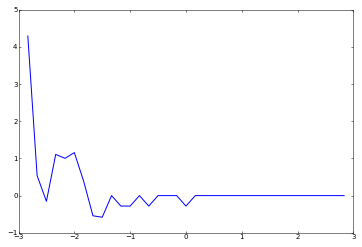

In [25]:
pp.plot(data["velocityTime"][5000], data["velocity"][5000])

In [26]:
def calcActMean(df, actCol, timeCol):
    result=dict();
    result[actCol+"Mean"]=[np.nanmean(np.vstack(df[actCol]), 0)];
    result[timeCol]=[df[timeCol].iloc[0]];
    result["numSamples"]=[len(df)];
    
    return pd.DataFrame(result)

In [27]:
def calcMaxConsecutive(boolArr):
    conSize=np.diff(
        np.where(
            np.concatenate(
                ([boolArr[0]], boolArr[:-1]!=boolArr[1:], [True])))[0]);
    if(conSize.size<=0):
        return 0;
    
    return np.max(conSize[::2])

In [28]:
data["velocityTime"][0]

array([-2.83441, -2.66768, -2.50095, -2.33422, -2.16749, -2.00076,
       -1.83403, -1.6673 , -1.50057, -1.33384, -1.16711, -1.00038,
       -0.83365, -0.66692, -0.50019, -0.33346, -0.16673,  0.     ,
        0.16673,  0.33346,  0.50019,  0.66692,  0.83365,  1.00038,
        1.16711,  1.33384,  1.50057,  1.6673 ,  1.83403,  2.00076,
        2.16749,  2.33422,  2.50095,  2.66768,  2.83441])

In [55]:
[data["velocityTime"][0]<-0.75] # so this gives True if the velocitytime is < than -0.75 before the stim

[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False], dtype=bool)]

In [29]:
data["stimulus"]

0         running_start
1         running_start
2         running_start
3         running_start
4         running_start
5         running_start
6         running_start
7         running_start
8         running_start
9         running_start
10        running_start
11        running_start
12        running_start
13        running_start
14        running_start
15        running_start
16        running_start
17        running_start
18        running_start
19        running_start
20        running_start
21        running_start
22        running_start
23        running_start
24        running_start
25        running_start
26        running_start
27        running_start
28        running_start
29        running_start
              ...      
119208     running_stop
119209     running_stop
119210     running_stop
119211     running_stop
119212     running_stop
119213     running_stop
119214     running_stop
119215     running_stop
119216     running_stop
119217     running_stop
119218     runni

In [30]:
data["conseqTThresh"]=np.ceil(np.array(0.3/data["frameP"]));

In [31]:
data.rename(columns={"condensedROI": "cROI"}, inplace=True);
data["rewarded"]=map(lambda w: np.nansum(w)>0, data["water"]);
data["preRest"]=map(lambda v, t, tth: calcMaxConsecutive(v[t<-0.75]>1)<=tth, 
                    data["velocity"], data["velocityTime"], data["conseqTThresh"]);
data["postRest"]=map(lambda v, t, tth: calcMaxConsecutive(v[t>=0.75]>1)<=tth, 
                     data["velocity"], data["velocityTime"], data["conseqTThresh"]);
data["preRun"]=map(lambda v, t, tth: calcMaxConsecutive(v[t<-0.75]<1)<=tth, 
                   data["velocity"], data["velocityTime"], data["conseqTThresh"]);
data["postRun"]=map(lambda v, t, tth: calcMaxConsecutive(v[t>=0.75]<1)<=tth, 
                    data["velocity"], data["velocityTime"], data["conseqTThresh"])

In [59]:
data.head()

,ROI,activity,expt,stimStart,stimulus,time,cROI,water,lapNum,waterTime,...,mouseID,frameP,exptTuple,keep,conseqTThresh,rewarded,preRest,postRest,preRun,postRun
0,"([[< Trial: gtr5_01, stimulus = , time = 2018...","[-0.0309844938827, -0.0912860838585, -0.011212...",[[]],29,running_start,"[-2.83441, -2.66768, -2.50095, -2.33422, -2.16...","(gtr5_01, , 1533247343932)","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-2.83441, -2.66768, -2.50095, -2.33422, -2.16...",...,gtr5_01,0.16673,"(gtr5_01, 2018-07-18-18h56m27s)",True,2.0,True,True,True,False,False
1,"([[< Trial: gtr5_01, stimulus = , time = 2018...","[-0.0155885322841, -0.00292924086795, 0.004120...",[[]],29,running_start,"[-2.83441, -2.66768, -2.50095, -2.33422, -2.16...","(gtr5_01, , 1533240530284)","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-2.83441, -2.66768, -2.50095, -2.33422, -2.16...",...,gtr5_01,0.16673,"(gtr5_01, 2018-07-18-18h56m27s)",True,2.0,True,True,True,False,False
2,"([[< Trial: gtr5_01, stimulus = , time = 2018...","[0.0103562265221, -0.0913170213111, -0.0457344...",[[]],29,running_start,"[-2.83441, -2.66768, -2.50095, -2.33422, -2.16...","(gtr5_01, , 1533239257298)","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-2.83441, -2.66768, -2.50095, -2.33422, -2.16...",...,gtr5_01,0.16673,"(gtr5_01, 2018-07-18-18h56m27s)",True,2.0,True,True,True,False,False
3,"([[< Trial: gtr5_01, stimulus = , time = 2018...","[0.152128906615, 0.016552348107, 0.01952728128...",[[]],29,running_start,"[-2.83441, -2.66768, -2.50095, -2.33422, -2.16...","(gtr5_01, , 1533239014386)","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-2.83441, -2.66768, -2.50095, -2.33422, -2.16...",...,gtr5_01,0.16673,"(gtr5_01, 2018-07-18-18h56m27s)",True,2.0,True,True,True,False,False
4,"([[< Trial: gtr5_01, stimulus = , time = 2018...","[0.00282193319211, -0.0150847305183, -0.007886...",[[]],29,running_start,"[-2.83441, -2.66768, -2.50095, -2.33422, -2.16...","(gtr5_01, , 1533240827603)","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-2.83441, -2.66768, -2.50095, -2.33422, -2.16...",...,gtr5_01,0.16673,"(gtr5_01, 2018-07-18-18h56m27s)",True,2.0,True,True,True,False,False


In [32]:
stims=np.array(data["stimulus"]);
preRest=np.array(data["preRest"]);
postRest=np.array(data["postRest"]);
preRun=np.array(data["preRun"]);
postRun=np.array(data["postRun"]);

In [33]:
data["valid"]=(((stims=="running_start") & preRest & postRun) |
               ((stims=="running_stop") & preRun & postRest)); 

data=data[~np.array(data["rewarded"])];
data=data[np.array(data["valid"])];
 
data["actDiff"]=map(lambda a, t: np.nanmean(a[t>=0])-np.nanmean(a[t<0]), data["activity"], data["time"]);
data["actP1P2Diff"]=map(lambda a, t: np.nanmean(a[t>=2.5])-np.nanmean(a[(t>=1.25) & (t<1.75)]), 
                        data["activity"], data["time"]);

/home/gergely/anaconda2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [34]:
with open("/data/gergely/workingData/raphe/running/transitionLocomotion_traces_new.pkl", "wb") as fh:
    pickle.dump(data.drop(["ROI", "expt"], 1), fh);
    
with open("/data/gergely/workingData/raphe/running/transitionLocomotion_traces_new.pkl") as fh:
    data=pickle.load(fh)

In [35]:
roiGroups=data.groupby(["expType", "cROI", "condition_day", "stimulus"]);
dataMean=roiGroups.mean();
dataMean=dataMean[["actDiff", "actP1P2Diff"]];
dataMean=dataMean.reset_index();
with open("/data/gergely/workingData/raphe/running/transitionLocomotion_means_byCD_new.pkl", "wb") as fh:
    pickle.dump(dataMean, fh);

In [36]:
resampledData=roiGroups.apply(vc.resampleResponses, "actDiff", minDataSize=5, iterations=1000);
resampledData.reset_index(inplace=True);
resampledData.drop(["level_4"], 1, inplace=True);
with open("/data/gergely/workingData/raphe/running/transitionLocomotion_resamples_byCD_new.pkl", "wb") as fh:
    pickle.dump(resampledData, fh);

In [37]:
resampledData=roiGroups.apply(vc.resampleResponses, "actP1P2Diff", minDataSize=5, iterations=1000);
resampledData.reset_index(inplace=True);
resampledData.drop(["level_4"], 1, inplace=True);
with open("/data/gergely/workingData/raphe/running/transitionLocomotion_diffTail_resamples_byCD_new.pkl", "wb") as fh:
    pickle.dump(resampledData, fh);


sigROIs=roiGroups.apply(vc.calcResponseMetrics, col="activity", xCol="time", 
                        iterations=3000, ciLevel=0.99, returnDF=True);
sigROIs.reset_index(inplace=True);
with open("/data/gergely/workingData/raphe/running/transitionLocomotion_byCD_sig_new.pkl", "wb") as fh:
    pickle.dump(sigROIs, fh);

In [38]:
roiGroups=data.groupby(["expType", "cROI", "condition", "stimulus"]);
resampledData=roiGroups.apply(vc.resampleResponses, "actDiff", minDataSize=5, iterations=1000);
resampledData.reset_index(inplace=True);
resampledData.drop(["level_4"], 1, inplace=True);
with open("/data/gergely/workingData/raphe/running/transitionLocomotion_resamples_byCondition_new.pkl", "wb") as fh:
    pickle.dump(resampledData, fh);
    
sigROIs=roiGroups.apply(vc.calcResponseMetrics, col="activity", xCol="time",
                        iterations=3000, ciLevel=0.99, returnDF=True);
sigROIs.reset_index(inplace=True);
with open("/data/gergely/workingData/raphe/running/transitionLocomotion_byCondition_sig_new.pkl", "wb") as fh:
    pickle.dump(sigROIs, fh);

In [39]:
dataMean=roiGroups.mean();
dataMean=dataMean[["actDiff", "actP1P2Diff"]];
dataMean=dataMean.reset_index();
with open("/data/gergely/workingData/raphe/running/transitionLocomotion_means_byCondition_new.pkl", "wb") as fh:
    pickle.dump(dataMean, fh);
    
roiGroups=data.groupby(["expType", "cROI", "stimulus"]);
resampledData=roiGroups.apply(vc.resampleResponses, "actDiff", minDataSize=5, iterations=1000);
resampledData.reset_index(inplace=True);
resampledData.drop(["level_3"], 1, inplace=True);
with open("/data/gergely/workingData/raphe/running/transitionLocomotion_resamples_byExpType_new.pkl", "wb") as fh:
    pickle.dump(resampledData, fh);

In [40]:
sigROIs=roiGroups.apply(vc.calcResponseMetrics, col="activity", xCol="time",
                        iterations=3000, ciLevel=0.99, returnDF=True);
sigROIs.reset_index(inplace=True);
with open("/data/gergely/workingData/raphe/running/transitionLocomotion_byExpType_sig_new.pkl", "wb") as fh:
    pickle.dump(sigROIs, fh);
    
dataMean=roiGroups.mean();
dataMean=dataMean[["actDiff", "actP1P2Diff"]];
dataMean=dataMean.reset_index();
with open("/data/gergely/workingData/raphe/running/transitionLocomotion_means_byExpType_new.pkl", "wb") as fh:
    pickle.dump(dataMean, fh);

In [41]:
with open("/data/gergely/workingData/raphe/running/transitionLocomotion_byCondition_sig_new.pkl") as fh:
    sigROIs=pickle.load(fh);
with open("/data/gergely/workingData/raphe/running/transitionLocomotion_means_byCondition_new.pkl") as fh:
    dataMean=pickle.load(fh);
with open("/data/gergely/workingData/raphe/running/transitionLocomotion_traces_new.pkl") as fh:
    data=pickle.load(fh);
data=data.merge(expProps[["expt", "exptTuple", "expType"]],
                on=["exptTuple", "expType"]);
    
stimuli=["running_start", "running_stop"];

In [42]:
velDF=vc.getBehData(imExpGroup, ["velocity"], stimuli, 
                    behPreTimes=3, behPostTimes=3, imageSync=True, deduplicate=True);
velDF=velDF.merge(expProps, on=["expt"]);

In [43]:
validTriggers=data[["expt", "stimulus", "stimStart"]].drop_duplicates();
velDF=velDF.merge(validTriggers, on=["expt", "stimulus", "stimStart"]);
velPSTH=velDF.groupby(["expType", "condition", "stimulus"]).apply(
    vc.aggregratePSTH, dataCol="velocity", timeCol="velocityTime", 
    measureSuffix="", varMethod=np.nanstd, varSuffix="SEM");
velPSTH.reset_index(inplace=True);
velPSTH["velocitySEM"]=map(lambda s, n: s/np.sqrt(n), 
                           velPSTH["velocitySEM"], velPSTH["numSamples"]);                          
velPSTH.set_index(["expType", "stimulus", "condition"], inplace=True);


sigROIs.rename(columns={"diffSigResShuffle": "sig", "traceMed": "act",
                "traceXVal": "time"}, inplace=True);
plotROIs=sigROIs.groupby(["expType", "stimulus", "condition", "sig"]).apply(
    vc.aggregratePSTH, dataCol="act", timeCol="time", measureSuffix="",
    varMethod=stats.sem, varSuffix="SEM");

In [44]:
sigROIs.sort_values(["expType", "stimulus", "condition", "sig"], inplace=True);
sigROIs.set_index(["expType", "stimulus", "condition"], inplace=True);
    
sigVals=[-1, 0, 1];
sigColors=["lightgrey", "purple", "olive"];

In [42]:
velPSTH[]

SyntaxError: invalid syntax (<ipython-input-42-474c69bd35f6>, line 1)

In [79]:
velPSTH.loc[("runTraining", stim, "A")]

level_3                                                         0
numSamples                                                     24
velocity        [2.44579259493, 2.47928421565, 3.13384327734, ...
velocitySEM     [0.583664842124, 0.561928121364, 0.49444181744...
velocityTime    [-2.989602, -2.822872, -2.656142, -2.489412, -...
Name: (runTraining, running_stop, A), dtype: object

In [ ]:
# from lab.misc import summarySheet
# from lab import ExperimentGroup

In [ ]:
# type(imExpGroup)

In [ ]:
# exp_group = ExperimentGroup([imExpGroup], label='bla')
# exp_group

In [ ]:
# summary = summarySheet(exp_group)
# plt.show()

In [ ]:
# coverpage=pdf.PdfPages("/data/gergely/Summaries/_raphe/locoTransitions_RF_plots_CB1.pdf");
# coverpage.savefig(summary)
# coverpage.close()

In [45]:
matplotlib.rcParams['pdf.fonttype'] = 42;
matplotlib.rcParams['ps.fonttype'] = 42;

In [48]:
pages=pdf.PdfPages("/data/gergely/Summaries/_raphe/locoTransitions_RF_plots.pdf");

plotGrid=gs.GridSpec(3, 1, height_ratios=[1, 4, 2]);
gridWInches=1.3;
gridHInches=1;

for stim in stimuli:
    fig=pp.figure(figsize=(gridWInches, gridHInches*3), dpi=3000);
    fig.suptitle(stim);
# this plots the velocity plot in the upper part     
    vel=velPSTH.loc[("randomForaging", stim, "A")];
    
    ax=fig.add_subplot(plotGrid[0, 0]);
    ax.plot(vel["velocityTime"], vel["velocity"], 
            lw=1, color="k", alpha=0.6);
    ax.fill_between(vel["velocityTime"], vel["velocity"]+vel["velocitySEM"],
                    vel["velocity"]-vel["velocitySEM"], lw=0, color="k",
                    alpha=0.4);
    ax.set_xlim([-3, 3]);
    ax.set_xticks([-3, -1.5, 0, 1.5, 3]);
    ax.set_xticklabels([]);
    ax.set_ylim([-1, 12]);
    ax.set_yticks([0, 5, 10]);
    plotTools.formatAxes(ax, "", "cm/s");
# this pots the heatmap for the ROIs     
    roiAct=sigROIs.loc[("randomForaging", stim, "A")];
    roiAct=vc.syncTraces(roiAct, "act", "time", returnDF=True);
    roiAct["actNorm"]=map(lambda a: a/np.nanmax(a), roiAct["actSync"]);
    numSigs=roiAct.groupby(["sig"]).size();            
    roiTime=roiAct["timeSync"].iloc[0];
    ax=fig.add_subplot(plotGrid[1, 0]);
    cax=ax.imshow(np.vstack(roiAct['actNorm'])[::-1,:], 
                  cmap="rainbow", interpolation="nearest", aspect="auto", 
                  extent=[roiTime[0], roiTime[-1], 0, len(roiAct)],
                  vmin=0, vmax=1);
#     cbar=fig.colorbar(cax, ticks=[0, 0.5, 1]);
    cumN=0;
    for sigVal in sigVals[:-1]:
        try:
            numSig=numSigs.loc[sigVal];
        except:
            continue;
        ax.axhline(y=numSig+cumN, lw=1, color="w");
        cumN=numSig+cumN;

    ax.set_xlim([-3, 3]);
    ax.set_xticks([-3, -1.5, 0, 1.5, 3]);
    ax.set_xticklabels([]);
    ax.set_yticks([0, 100, 1000]);    
    plotTools.formatAxes(ax, "", "axon #");
    
    
# this plots the bottom part for the traces    
    ax=fig.add_subplot(plotGrid[2, 0]);
    for sigVal in sigVals:
        plotSig=plotROIs.loc[("randomForaging", stim, "A", sigVal, 0)];
        ax.plot(plotSig["time"], plotSig["act"], lw=1, color=sigColors[sigVal],
                alpha=0.6);
        ax.fill_between(plotSig["time"], plotSig["act"]+plotSig["actSEM"],
                        plotSig["act"]-plotSig["actSEM"], lw=0, color=sigColors[sigVal],
                        alpha=0.4);
    ax.set_xlim([-3, 3]);
    ax.set_xticks([-3, -1.5, 0, 1.5, 3]);
    ax.set_xticklabels(["-3", "", "0", "", "3"]);
    ax.set_ylim([-0.1, 0.4]);
    ax.set_yticks([0, 0.2, 0.4]);
    plotTools.formatAxes(ax, "time", "dF/F")
    
    fig.tight_layout(pad=0, h_pad=0, w_pad=0);
    pages.savefig(fig);
    pp.close(fig);
pages.close()

/home/gergely/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [48]:
# for presentation with dark bckground
import matplotlib.style
matplotlib.style.use('dark_background')

pages=pdf.PdfPages("/data/gergely/Summaries/_raphe/locomotion/locoTransitions_RF_plots_dark.pdf");

plotGrid=gs.GridSpec(3, 1, height_ratios=[1, 4, 2]);
gridWInches=1.3;
gridHInches=1;

for stim in stimuli:
    fig=pp.figure(figsize=(gridWInches, gridHInches*3), dpi=3000);
    fig.suptitle(stim);
# this plots the velocity plot in the upper part     
    vel=velPSTH.loc[("hiddenRewards", stim, "A")];
    
    ax=fig.add_subplot(plotGrid[0, 0]);
    ax.plot(vel["velocityTime"], vel["velocity"], 
            lw=1, color="k", alpha=0.6);
    ax.fill_between(vel["velocityTime"], vel["velocity"]+vel["velocitySEM"],
                    vel["velocity"]-vel["velocitySEM"], lw=0, color="k",
                    alpha=0.4);
    ax.set_xlim([-3, 3]);
    ax.set_xticks([-3, -1.5, 0, 1.5, 3]);
    ax.set_xticklabels([]);
    ax.set_ylim([-1, 12]);
    ax.set_yticks([0, 5, 10]);
    plotTools.formatAxes(ax, "", "cm/s");
# this pots the heatmap for the ROIs     
    roiAct=sigROIs.loc[("randomForaging", stim, "A")];
    roiAct=vc.syncTraces(roiAct, "act", "time", returnDF=True);
    roiAct["actNorm"]=map(lambda a: a/np.nanmax(a), roiAct["actSync"]);
    numSigs=roiAct.groupby(["sig"]).size();            
    roiTime=roiAct["timeSync"].iloc[0];
    ax=fig.add_subplot(plotGrid[1, 0]);
    cax=ax.imshow(np.vstack(roiAct['actNorm'])[::-1,:], 
                  cmap="rainbow", interpolation="nearest", aspect="auto", 
                  extent=[roiTime[0], roiTime[-1], 0, len(roiAct)],
                  vmin=0, vmax=1);
#     cbar=fig.colorbar(cax, ticks=[0, 0.5, 1]);
    cumN=0;
    for sigVal in sigVals[:-1]:
        try:
            numSig=numSigs.loc[sigVal];
        except:
            continue;
        ax.axhline(y=numSig+cumN, lw=1, color="w");
        cumN=numSig+cumN;

    ax.set_xlim([-3, 3]);
    ax.set_xticks([-3, -1.5, 0, 1.5, 3]);
    ax.set_xticklabels([]);
    ax.set_yticks([0, 100, 1000]);    
    plotTools.formatAxes(ax, "", "axon #");
    
    
# this plots the bottom part for the traces    
    ax=fig.add_subplot(plotGrid[2, 0]);
    for sigVal in sigVals:
        plotSig=plotROIs.loc[("randomForaging", stim, "A", sigVal, 0)];
        ax.plot(plotSig["time"], plotSig["act"], lw=1, color=sigColors[sigVal],
                alpha=0.6);
        ax.fill_between(plotSig["time"], plotSig["act"]+plotSig["actSEM"],
                        plotSig["act"]-plotSig["actSEM"], lw=0, color=sigColors[sigVal],
                        alpha=0.4);
    ax.set_xlim([-3, 3]);
    ax.set_xticks([-3, -1.5, 0, 1.5, 3]);
    ax.set_xticklabels(["-3", "", "0", "", "3"]);
    ax.set_ylim([-0.1, 0.4]);
    ax.set_yticks([0, 0.2, 0.4]);
    plotTools.formatAxes(ax, "time", "dF/F")
    
    fig.tight_layout(pad=0, h_pad=0, w_pad=0);
    pages.savefig(fig);
    pp.close(fig);
pages.close()

/home/gergely/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
